In [18]:
import cv2
import numpy as np
import os

# Path to the image(檔案路徑)
image_path = r"C:\Users\USER\Desktop\-0.5c-750-30m\1.tif"

# Global variables for cropping
cropping = False
x_start, y_start, x_end, y_end = 0, 0, 0, 0
cropped_image = None

def mouse_crop(event, x, y, flags, param):
    global x_start, y_start, x_end, y_end, cropping, cropped_image

    if event == cv2.EVENT_LBUTTONDOWN:
        x_start, y_start, x_end, y_end = x, y, x, y
        cropping = True

    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping:
            x_end, y_end = x, y
            img_copy = image.copy()
            cv2.rectangle(img_copy, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)
            cv2.imshow("Image", img_copy)

    elif event == cv2.EVENT_LBUTTONUP:
        x_end, y_end = x, y
        cropping = False
        ref_point = [(x_start, y_start), (x_end, y_end)]

        if len(ref_point) == 2:
            cropped_image = image[y_start:y_end, x_start:x_end]
            cv2.imshow("Cropped Image", cropped_image)

# Read the image
image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Image not found at {image_path}")

# Resize image for display if it is too large
max_height = 800
max_width = 800
height, width = image.shape[:2]

if height > max_height or width > max_width:
    scaling_factor = min(max_height / float(height), max_width / float(width))
    image = cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

# Extract directory and filename from the image path
image_dir = os.path.dirname(image_path)
image_filename = os.path.basename(image_path)
cropped_image_filename = f"cropped_{image_filename}"
cropped_image_path = os.path.join(image_dir, cropped_image_filename)

# Create a window and set a mouse callback for cropping
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", mouse_crop)

# Display the image and wait for the user to select the ROI
print("Select the ROI and press 'c' to confirm cropping.")
while True:
    cv2.imshow("Image", image)
    key = cv2.waitKey(1) & 0xFF

    # Press 'c' to confirm cropping
    if key == ord("c"):
        if cropped_image is not None:
            # Save the cropped image
            cv2.imwrite(cropped_image_path, cropped_image)
            print(f"Cropped image saved as {cropped_image_path}")
            break
        else:
            print("No ROI selected. Please select an ROI.")

cv2.destroyWindow("Image")

# Keep the cropped image window open
while True:
    cv2.imshow("Cropped Image", cropped_image)
    key = cv2.waitKey(1) & 0xFF

    # Press 'q' to quit
    if key == ord("q"):
        break

cv2.destroyAllWindows()


Select the ROI and press 'c' to confirm cropping.
Cropped image saved as C:\Users\USER\Desktop\-0.5c-750-30m\cropped_1.tif


In [31]:
import cv2
import numpy as np

# Path to the image with the scale bar
image_with_scale_path = image_path

# Load the image
image_with_scale = cv2.imread(image_with_scale_path)
if image_with_scale is None:
    raise ValueError(f"Image not found at {image_with_scale_path}")

# Resize image for display if it is too large
max_height = 1000
max_width = 1000
height, width = image_with_scale.shape[:2]

resize_factor = min(max_width / width, max_height / height, 1)
display_image = cv2.resize(image_with_scale, (int(width * resize_factor), int(height * resize_factor)))

# Create a copy of the image to draw the line
image_copy = display_image.copy()

# Global variables for drawing the line
drawing = False
x_start, y_start, x_end, y_end = 0, 0, 0, 0

def draw_line(event, x, y, flags, param):
    global x_start, y_start, x_end, y_end, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        x_start, y_start = int(x / resize_factor), int(y / resize_factor)

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            image_copy[:] = display_image[:]
            cv2.line(image_copy, (int(x_start * resize_factor), int(y_start * resize_factor)), (x, int(y_start * resize_factor)), (0, 255, 0), 2)
            cv2.imshow('Scale Bar', image_copy)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        x_end, y_end = int(x / resize_factor), int(y_start)
        cv2.line(image_copy, (int(x_start * resize_factor), int(y_start * resize_factor)), (x, int(y_start * resize_factor)), (0, 255, 0), 2)
        cv2.imshow('Scale Bar', image_copy)

# Create a window and set a mouse callback to draw the line
cv2.namedWindow('Scale Bar')
cv2.setMouseCallback('Scale Bar', draw_line)

# Display the image and wait for the user to draw the line
print("Draw a horizontal line over the scale bar and press 'c' to confirm.")
while True:
    cv2.imshow('Scale Bar', image_copy)
    key = cv2.waitKey(1) & 0xFF

    # Press 'c' to confirm
    if key == ord('c'):
        break

cv2.destroyAllWindows()

# Calculate the number of pixels in the drawn line
num_pixels = abs(x_end - x_start)
print(f"Number of pixels in the scale bar: {num_pixels}")

# Verify the coordinates and resize factor
print(f"x_start: {x_start}, x_end: {x_end}, y_start: {y_start}, resize_factor: {resize_factor}")

# Input the real length of the scale bar
real_length = float(input("Enter the real length of the scale bar in micrometers: "))

# Calculate the real-world distance per pixel
real_distance_per_pixel = real_length / num_pixels
print(f"Real-world distance per pixel: {real_distance_per_pixel} micrometers per pixel")


Draw a horizontal line over the scale bar and press 'c' to confirm.
Number of pixels in the scale bar: 0
x_start: 0, x_end: 0, y_start: 0, resize_factor: 0.9765625


KeyboardInterrupt: Interrupted by user

In [ ]:
import cv2
import numpy as np
import os

# Read the image in grayscale
image = cv2.imread(cropped_image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError(f"Image not found at {image_path}")

# Global variables for trackbars
initial_clahe_clip_limit = 2.0
initial_clahe_tile_grid_size = 8
gaussian_blur_size = 5
median_blur_size = 5
final_clahe_clip_limit = 2.0
final_clahe_tile_grid_size = 8
low_threshold = 50
high_threshold = 150

initial_clahe_image = None
blurred_image = None
median_blurred_image = None
final_clahe_image = None
edges_image = None

# Global variable for resize factor
resize_factor = 1.0

def preprocess_image(initial_clahe_clip_limit, initial_clahe_tile_grid_size, gaussian_blur_size, median_blur_size, final_clahe_clip_limit, final_clahe_tile_grid_size):
    global initial_clahe_image, blurred_image, median_blurred_image, final_clahe_image, edges_image

    # Ensure tile grid size is at least 2x2
    initial_clahe_tile_grid_size = max(2, initial_clahe_tile_grid_size)
    final_clahe_tile_grid_size = max(2, final_clahe_tile_grid_size)
    
    # Apply initial CLAHE
    initial_clahe = cv2.createCLAHE(clipLimit=initial_clahe_clip_limit, tileGridSize=(initial_clahe_tile_grid_size, initial_clahe_tile_grid_size))
    initial_clahe_image = initial_clahe.apply(image)
    
    # Apply Gaussian blur
    if gaussian_blur_size % 2 == 0: gaussian_blur_size += 1
    blurred_image = cv2.GaussianBlur(initial_clahe_image, (gaussian_blur_size, gaussian_blur_size), 0)
    
    # Apply median blur
    if median_blur_size % 2 == 0: median_blur_size += 1
    median_blurred_image = cv2.medianBlur(blurred_image, median_blur_size)
    
    # Apply final CLAHE after blurring
    final_clahe = cv2.createCLAHE(clipLimit=final_clahe_clip_limit, tileGridSize=(final_clahe_tile_grid_size, final_clahe_tile_grid_size))
    final_clahe_image = final_clahe.apply(median_blurred_image)

    # Apply Canny edge detection
    edges_image = cv2.Canny(final_clahe_image, low_threshold, high_threshold)

    # Display images with resize factor
    cv2.imshow('Initial CLAHE', cv2.resize(initial_clahe_image, None, fx=resize_factor, fy=resize_factor))
    cv2.imshow('Gaussian Blur', cv2.resize(blurred_image, None, fx=resize_factor, fy=resize_factor))
    cv2.imshow('Median Blur', cv2.resize(median_blurred_image, None, fx=resize_factor, fy=resize_factor))
    cv2.imshow('Final CLAHE', cv2.resize(final_clahe_image, None, fx=resize_factor, fy=resize_factor))
    cv2.imshow('Canny Edge Detection', cv2.resize(edges_image, None, fx=resize_factor, fy=resize_factor))

def on_initial_clahe_clip_limit_trackbar(val):
    global initial_clahe_clip_limit
    initial_clahe_clip_limit = val / 10.0
    preprocess_image(initial_clahe_clip_limit, initial_clahe_tile_grid_size, gaussian_blur_size, median_blur_size, final_clahe_clip_limit, final_clahe_tile_grid_size)

def on_initial_clahe_tile_grid_size_trackbar(val):
    global initial_clahe_tile_grid_size
    initial_clahe_tile_grid_size = val
    preprocess_image(initial_clahe_clip_limit, initial_clahe_tile_grid_size, gaussian_blur_size, median_blur_size, final_clahe_clip_limit, final_clahe_tile_grid_size)

def on_gaussian_blur_trackbar(val):
    global gaussian_blur_size
    gaussian_blur_size = val
    preprocess_image(initial_clahe_clip_limit, initial_clahe_tile_grid_size, gaussian_blur_size, median_blur_size, final_clahe_clip_limit, final_clahe_tile_grid_size)

def on_median_blur_trackbar(val):
    global median_blur_size
    median_blur_size = val
    preprocess_image(initial_clahe_clip_limit, initial_clahe_tile_grid_size, gaussian_blur_size, median_blur_size, final_clahe_clip_limit, final_clahe_tile_grid_size)

def on_final_clahe_clip_limit_trackbar(val):
    global final_clahe_clip_limit
    final_clahe_clip_limit = val / 10.0
    preprocess_image(initial_clahe_clip_limit, initial_clahe_tile_grid_size, gaussian_blur_size, median_blur_size, final_clahe_clip_limit, final_clahe_tile_grid_size)

def on_final_clahe_tile_grid_size_trackbar(val):
    global final_clahe_tile_grid_size
    final_clahe_tile_grid_size = val
    preprocess_image(initial_clahe_clip_limit, initial_clahe_tile_grid_size, gaussian_blur_size, median_blur_size, final_clahe_clip_limit, final_clahe_tile_grid_size)

def on_low_threshold_trackbar(val):
    global low_threshold
    low_threshold = val
    preprocess_image(initial_clahe_clip_limit, initial_clahe_tile_grid_size, gaussian_blur_size, median_blur_size, final_clahe_clip_limit, final_clahe_tile_grid_size)

def on_high_threshold_trackbar(val):
    global high_threshold
    high_threshold = val
    preprocess_image(initial_clahe_clip_limit, initial_clahe_tile_grid_size, gaussian_blur_size, median_blur_size, final_clahe_clip_limit, final_clahe_tile_grid_size)

def save_images():
    base_dir = os.path.dirname(image_path)
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    
    # Save each stage
    cv2.imwrite(os.path.join(base_dir, f"{base_filename}_initial_clahe.tif"), initial_clahe_image)
    cv2.imwrite(os.path.join(base_dir, f"{base_filename}_gaussian_blur.tif"), blurred_image)
    cv2.imwrite(os.path.join(base_dir, f"{base_filename}_median_blur.tif"), median_blurred_image)
    cv2.imwrite(os.path.join(base_dir, f"{base_filename}_final_clahe.tif"), final_clahe_image)
    cv2.imwrite(os.path.join(base_dir, f"{base_filename}_canny_edges.tif"), edges_image)
    print(f"Images saved at {base_dir}")

    # Overlay edges on final CLAHE image
    overlay_image = cv2.cvtColor(final_clahe_image, cv2.COLOR_GRAY2BGR)
    overlay_image[edges_image > 0] = [0, 0, 255]  # Red color for edges
    cv2.imwrite(os.path.join(base_dir, f"{base_filename}_final_overlay.tif"), overlay_image)
    print(f"Overlay image saved at {base_dir}")

# Create windows to display the images
cv2.namedWindow('Initial CLAHE')
cv2.namedWindow('Gaussian Blur')
cv2.namedWindow('Median Blur')
cv2.namedWindow('Final CLAHE')
cv2.namedWindow('Canny Edge Detection')

# Create trackbars for various preprocessing steps
cv2.createTrackbar('Initial CLAHE Clip Limit', 'Initial CLAHE', int(initial_clahe_clip_limit * 10), 100, on_initial_clahe_clip_limit_trackbar)
cv2.createTrackbar('Initial CLAHE Tile Grid Size', 'Initial CLAHE', initial_clahe_tile_grid_size, 30, on_initial_clahe_tile_grid_size_trackbar)
cv2.createTrackbar('Gaussian Blur Size', 'Gaussian Blur', gaussian_blur_size, 31, on_gaussian_blur_trackbar)
cv2.createTrackbar('Median Blur Size', 'Median Blur', median_blur_size, 31, on_median_blur_trackbar)
cv2.createTrackbar('Final CLAHE Clip Limit', 'Final CLAHE', int(final_clahe_clip_limit * 10), 100, on_final_clahe_clip_limit_trackbar)
cv2.createTrackbar('Final CLAHE Tile Grid Size', 'Final CLAHE', final_clahe_tile_grid_size, 30, on_final_clahe_tile_grid_size_trackbar)
cv2.createTrackbar('Low Threshold', 'Canny Edge Detection', low_threshold, 255, on_low_threshold_trackbar)
cv2.createTrackbar('High Threshold', 'Canny Edge Detection', high_threshold, 255, on_high_threshold_trackbar)

# Apply initial preprocessing
preprocess_image(initial_clahe_clip_limit, initial_clahe_tile_grid_size, gaussian_blur_size, median_blur_size, final_clahe_clip_limit, final_clahe_tile_grid_size)

# Wait for user interaction
# Wait for user interaction
print("Adjust the preprocessing parameters to enhance the edges. Press 's' to save the images, 'q' to quit. Use '+' and '-' to zoom in and out.")
handle_zoom()

cv2.destroyAllWindows()

base_dir = os.path.dirname(image_path)
base_filename = os.path.splitext(os.path.basename(image_path))[0]
cropped_image_filename = f"{base_filename}_canny_edges.tif"
edge_image_path = os.path.join(image_dir, cropped_image_filename)

Adjust the preprocessing parameters to enhance the edges. Press 's' to save the images, 'q' to quit. Use '+' and '-' to zoom in and out.


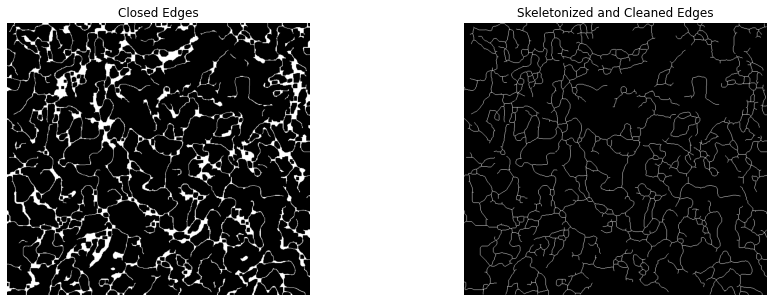

Cleaned edge-detected image saved as C:\Users\USER\Desktop\-0.5c-750-30m\1_cleaned_edges.tif


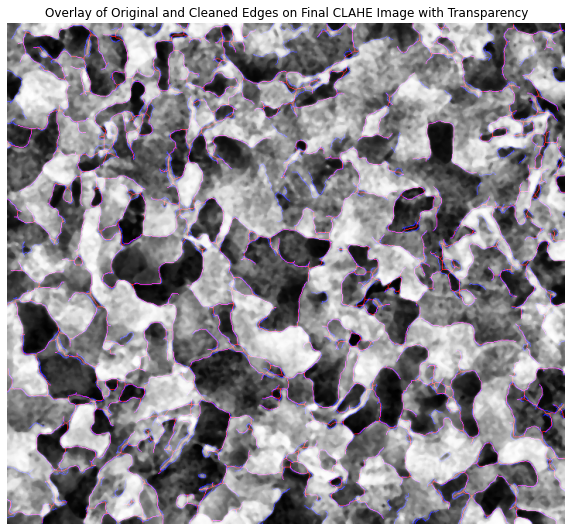

Overlay image with transparency saved as C:\Users\USER\Desktop\-0.5c-750-30m\1_overlay_transparent.tif


In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize

# Path to the uploaded image
# Read the edge-detected image
edges_image = cv2.imread(edge_image_path, cv2.IMREAD_GRAYSCALE)
if edges_image is None:
    raise ValueError(f"Edge image not found at {edge_image_path}")

### Step 1: Apply dilation followed by erosion (closing)
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(edges_image, kernel, iterations= 3)
closed_image = cv2.erode(dilated_image, kernel, iterations= 3)

# Step 2: Apply skeletonization
skeleton = skeletonize(closed_image // 255) * 255
skeleton = skeleton.astype(np.uint8)

# Step 3: Remove small objects using connected components analysis
num_labels, labels_im = cv2.connectedComponents(skeleton)
sizes = np.bincount(labels_im.ravel())
mask_sizes = sizes > 100  # Keep components larger than 100 pixels
mask_sizes[0] = 0  # Remove background
cleaned_image = mask_sizes[labels_im]

# Convert cleaned image to uint8
cleaned_image = (cleaned_image * 255).astype(np.uint8)

# Display the results
plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.title("Closed Edges")
plt.imshow(closed_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Skeletonized and Cleaned Edges")
plt.imshow(cleaned_image, cmap='gray')
plt.axis('off')

plt.show()

# Save the cleaned image
cleaned_edges_output_path = os.path.join(image_dir,f"{base_filename}_cleaned_edges.tif")
cv2.imwrite(cleaned_edges_output_path, cleaned_image)
print(f"Cleaned edge-detected image saved as {cleaned_edges_output_path}")
# Convert the final CLAHE image to color
final_clahe_color = cv2.cvtColor(final_clahe_image, cv2.COLOR_GRAY2BGR)

# Create an overlay for original edges in blue with transparency
overlay_blue = np.zeros_like(final_clahe_color)
overlay_blue[edges_image > 0] = [255, 0, 0]  # Blue

# Create an overlay for cleaned edges in red with transparency
overlay_red = np.zeros_like(final_clahe_color)
overlay_red[cleaned_image > 0] = [0, 0, 255]  # Red


# Combine the overlays with the original image with transparency
final_overlay = cv2.addWeighted(final_clahe_color, 1.0, overlay_blue, 1, 0)
final_overlay = cv2.addWeighted(final_overlay, 1.0, overlay_red, 1, 0)

# Display the overlay result
plt.figure(figsize=(10, 10))
plt.title('Overlay of Original and Cleaned Edges on Final CLAHE Image with Transparency')
plt.imshow(cv2.cvtColor(final_overlay, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
# Save the overlay image
overlay_output_path = os.path.join(image_dir, f"{base_filename}_overlay_transparent.tif")
cv2.imwrite(overlay_output_path, final_overlay)
print(f"Overlay image with transparency saved as {overlay_output_path}")

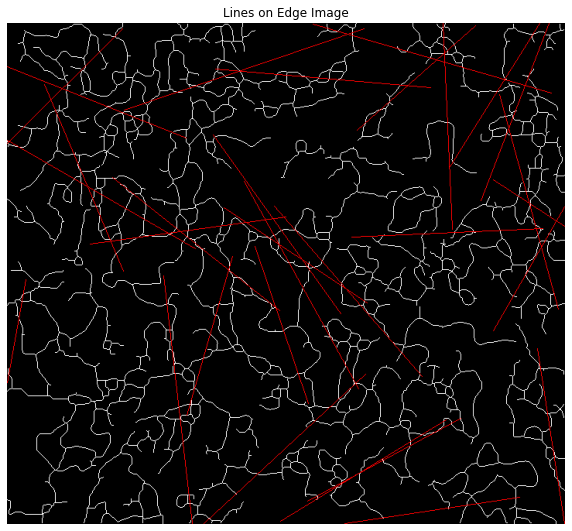

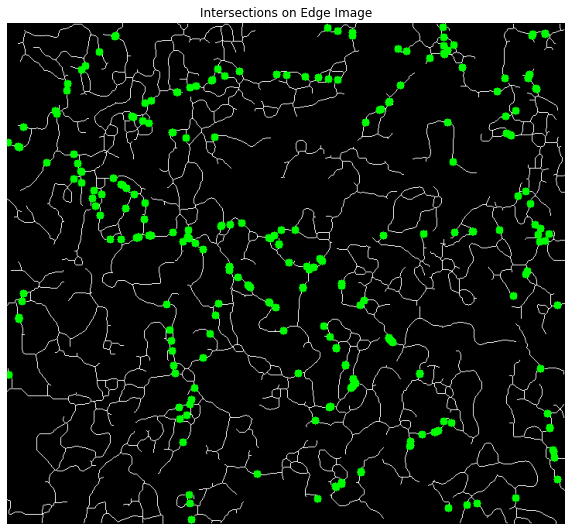

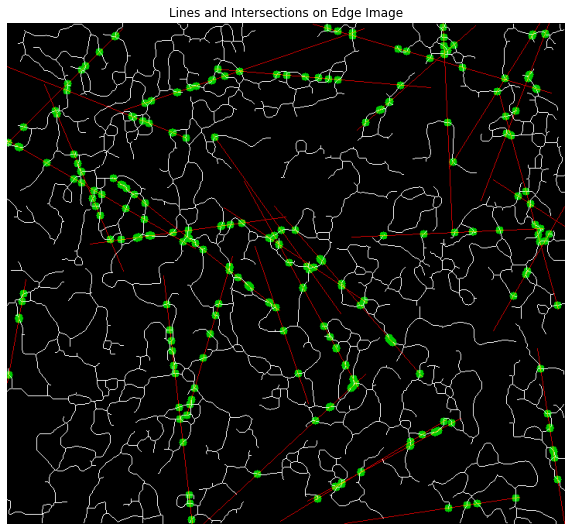

True

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os

# Load the edge-detected image
edge_image_path = cleaned_edges_output_path
edge_image = cv2.imread(edge_image_path, cv2.IMREAD_GRAYSCALE)
if edge_image is None:
    raise ValueError(f"Edge image not found at {edge_image_path}")

# Get image dimensions
height, width = edge_image.shape

# Function to generate random lines
def generate_random_lines(num_lines, min_length, max_length):
    lines = []
    for _ in range(num_lines):
        length = random.randint(min_length, max_length)
        x1, y1 = random.randint(0, width - 1), random.randint(0, height - 1)
        angle = random.uniform(0, 2 * np.pi)
        x2 = int(x1 + length * np.cos(angle))
        y2 = int(y1 + length * np.sin(angle))
        
        # Ensure the second point is within image bounds
        x2 = max(0, min(width - 1, x2))
        y2 = max(0, min(height - 1, y2))
        
        lines.append(((x1, y1), (x2, y2), length))
    return lines

####線段參數
num_lines = 30
min_length = 200
max_length = 350
lines = generate_random_lines(num_lines, min_length, max_length)

# Function to calculate intersections and record intersection points
def calculate_intersections(line, edge_image):
    (x1, y1), (x2, y2), length = line
    num_intersections = 0
    points = []

    # Use Bresenham's line algorithm to iterate through the line's pixels
    steep = abs(y2 - y1) > abs(x2 - x1)
    if steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
    dx = x2 - x1
    dy = abs(y2 - y1)
    error = dx // 2
    ystep = 1 if y1 < y2 else -1
    y = y1
    
    for x in range(x1, x2 + 1):
        coord = (y, x) if steep else (x, y)
        if 0 <= coord[1] < height and 0 <= coord[0] < width:
            if edge_image[coord[1], coord[0]] > 0:
                num_intersections += 1
                points.append((coord[0], coord[1]))
        error -= dy
        if error < 0:
            y += ystep
            error += dx
            
    return num_intersections, points

# Example calibration factor for real distance per pixel (modify as needed)


# Create a DataFrame to store the results
results = []
all_intersection_points = []
for line in lines:
    (x1, y1), (x2, y2), length = line
    center_x = (x1 + x2) / 2
    center_y = (y1 + y2) / 2
    intersections, intersection_points = calculate_intersections(line, edge_image)
    intersections_per_unit_length = intersections / length
    results.append({
        "Center Point": (center_x, center_y),
        "Line Length": length,
        "Line Length Real": length * real_distance_per_pixel,
        "Intersections": intersections,
        "Intersections per Unit Length": intersections_per_unit_length,
        "Intersections per Unit Length Real": intersections_per_unit_length / real_distance_per_pixel,
    })
    all_intersection_points.extend(intersection_points)

df = pd.DataFrame(results)

# Draw only the lines on the image
output_lines_image = cv2.cvtColor(edge_image, cv2.COLOR_GRAY2BGR)
for line in lines:
    (x1, y1), (x2, y2), length = line
    cv2.line(output_lines_image, (x1, y1), (x2, y2), (0, 0, 255), 1)

# Draw only the intersection points on a separate image and increase circle size
output_circles_image = cv2.cvtColor(edge_image, cv2.COLOR_GRAY2BGR)
for point in all_intersection_points:
    cv2.circle(output_circles_image, point, 5, (0, 255, 0), -1)

# Combine lines and circles on the same image
combined_image = cv2.addWeighted(output_lines_image, 0.8, output_circles_image, 0.8, 0)

# Visualize the lines image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_lines_image, cv2.COLOR_BGR2RGB))
plt.title('Lines on Edge Image')
plt.axis('off')
plt.show()

# Visualize the circles image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_circles_image, cv2.COLOR_BGR2RGB))
plt.title('Intersections on Edge Image')
plt.axis('off')
plt.show()

# Visualize the combined image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.title('Lines and Intersections on Edge Image')
plt.axis('off')
plt.show()

# Save the output images
image_dir = os.path.dirname(edge_image_path)
base_filename = os.path.splitext(os.path.basename(edge_image_path))[0]
combined_output_path = os.path.join(image_dir, f"{base_filename}_combined_output.tif")
cv2.imwrite(combined_output_path, combined_image)
line_output_path = os.path.join(image_dir, f"{base_filename}_line_output.tif")
cv2.imwrite(line_output_path, output_lines_image)

In [28]:
### 过滤掉 Intersections 列值小于 num 的行
num = 5

# 过滤掉 Intersections 列值小于 num 的行
df_filtered = df[df["Intersections"] >= num]
filtered_grain_size_path = os.path.join(image_dir, f"{base_filename}_filtered_grain_size.xlsx")
df_filtered.to_excel(filtered_grain_size_path)

In [29]:
### 輸出
grain_size_path = os.path.join(image_dir, f"{base_filename}_grain_size.xlsx")
df.to_excel(grain_size_path)